<a href="https://colab.research.google.com/github/Alias23/IO-PRACTICAS/blob/main/IO_PRACTICA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tiempo medio de espera en cola W_q: 0.7500 h (45.00 min)
Tiempo medio en sistema W:       0.9500 h (57.00 min)


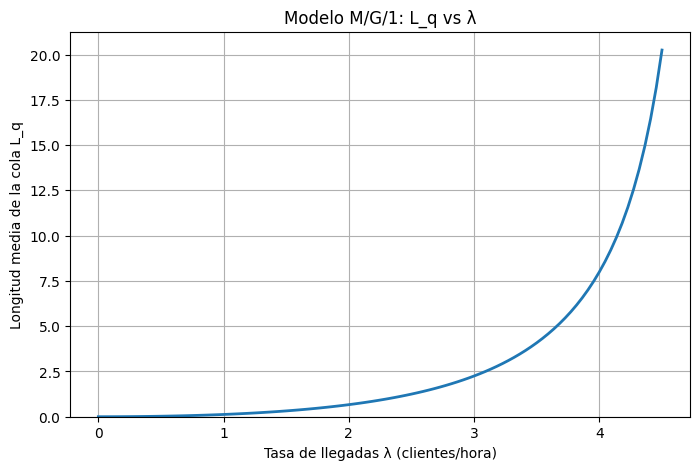

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del modelo
mu = 1 / 0.2    # tasa media de servicio (clientes/hora)
sigma = 0.4     # desviación estándar del tiempo de servicio (horas)
lam = 3         # tasa media de llegadas (clientes/hora)

# Comprobación de estabilidad
rho = lam / mu
if rho >= 1:
    raise ValueError(f"Sistema inestable: ρ = {rho:.3f} ≥ 1")

# Cálculo de Wq y W (fórmula de Pollaczek–Khinchine)
W_q = (lam * (sigma**2 + (1/mu)**2)) / (2 * (1 - rho))
W = 1/mu + W_q

print(f"Tiempo medio de espera en cola W_q: {W_q:.4f} h ({W_q*60:.2f} min)")
print(f"Tiempo medio en sistema W:       {W:.4f} h ({W*60:.2f} min)")

# Estudio de Lq en función de lambda
lambdas = np.linspace(0, 4.5, 100)
rhos = lambdas / mu

# Evitamos valores no definidos cuando rho >= 1
L_q = np.where(rhos < 1,
               (lambdas**2 * sigma**2 + rhos**2) / (2 * (1 - rhos)),
               np.nan)

# Dibujar gráfico
plt.figure(figsize=(8, 5))
plt.plot(lambdas, L_q, linewidth=2)
plt.xlabel("Tasa de llegadas λ (clientes/hora)")
plt.ylabel("Longitud media de la cola L_q")
plt.title("Modelo M/G/1: L_q vs λ")
plt.grid(True)
plt.ylim(bottom=0)
plt.show()
